In [1]:
# import the modules and function you will use here
import pandas as pd
import numpy as np


This problem deals with regularized regression. The boston dataset is described right after it is loaded in just by running the code that is aleardy there.

In [ ]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston['DESCR'])
x = pd.DataFrame(boston['data'], columns=boston['feature_names'])
y = pd.Series(boston['target'])

$(a)$ Split the data into a train and a test set

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42)

$(b)$ Use this data to fit an OLS, LASSO, ridge, and ElasticNet model on the data. For now, use the default for the penalty coefficient. Display the coefficients and test error for each.

In [4]:
# OLS default
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train, y_train)
print("lr.coef_:", lr.coef_)
print("lr.intercept_:", lr.intercept_)
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

lr.coef_: [-1.28322638e-01  2.95517751e-02  4.88590934e-02  2.77350326e+00
 -1.62388292e+01  4.36875476e+00 -9.24808158e-03 -1.40086668e+00
  2.57761243e-01 -9.95694820e-03 -9.23122944e-01  1.31854199e-02
 -5.17639519e-01]
lr.intercept_: 29.8364201638386
Training set score: 0.75
Test set score: 0.68


In [5]:
# LASSO default
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
print("Alpha: {:.2f}".format(lasso.alpha))
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso.coef_ != 0))

Alpha: 1.00
Training set score: 0.69
Test set score: 0.65
Number of features used: 10


In [6]:
# Ridge default
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print("Alpha: {:.2f}".format(ridge.alpha))
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Alpha: 1.00
Training set score: 0.75
Test set score: 0.68


In [7]:
# ElasticNet default
from sklearn.linear_model import ElasticNet
en = ElasticNet().fit(X_train, y_train)
print("en.coef_:", en.coef_)
print("lr.intercept_:", en.intercept_)
print("Training set score: {:.2f}".format(en.score(X_train, y_train)))
print("Test set score: {:.2f}".format(en.score(X_test, y_test)))

en.coef_: [-0.10270885  0.03414157 -0.00689058  0.         -0.          1.14428334
  0.01442808 -0.70930241  0.26472536 -0.01347162 -0.74428292  0.01200929
 -0.78282769]
lr.intercept_: 39.443439148670606
Training set score: 0.69
Test set score: 0.66


$(c)$ Describe the differences that you see in the coefficients and error. What is the cause of this difference in coefficients?

In [8]:
# Two of the models give the same test set score (OLS and Ridge). LASSO is .03 less than the others, and ElasticNet is .02 is less than the others.
# This difference in coefficients is due to the models estimating their parameters in a different way, with different loss functions. 
# Lasso uses the absolute value function to restrict less-predictive Xs, and even reduce some of them to zero.

$(d)$ Use K-fold cross validation to find an optimal penalty parameter for Ridge and Lasso.

In [9]:
# For Ridge 
from sklearn.model_selection import GridSearchCV
# define grid for alpha
alpha_grid = {'alpha': [.002, .004, .006, .008, .01, .012, .014, .016 ,.018, .02 ],'max_iter': [100000]}
grid_search = GridSearchCV(Ridge(),alpha_grid,cv=5,return_train_score=True)
best_model=grid_search.fit(X_train,y_train)
print("Best alpha fo Ridge: ",best_model.best_estimator_.get_params()['alpha'])

Best alpha fo Ridge:  0.002


In [10]:
# For LASSO
from sklearn.model_selection import GridSearchCV
# define grid for alpha
alpha_grid = {'alpha': [.002, .004, .006, .008, .01, .012, .014, .016 ,.018, .02 ],'max_iter': [100000]}
grid_search = GridSearchCV(Lasso(),alpha_grid,cv=5,return_train_score=True)
best_model=grid_search.fit(X_train,y_train)
print("Best alpha for Lasso: ",best_model.best_estimator_.get_params()['alpha'])

Best alpha for Lasso:  0.002


$(e)$ Now use cross validation, to find the optimal penalty parameter. Use LOOCV and Kfold cross validation with K=5 to find optimal parameters for the ElasticNet model. How do the test errors and optimal parameters differ?

In [ ]:
# For ElasticNet
  # LOOCV
from sklearn.model_selection import GridSearchCV
# define grid for alpha
alpha_grid = {'alpha': [.002, .004, .006, .008, .01, .012, .014, .016 ,.018, .02 ],'max_iter': [100000]}
grid_search = GridSearchCV(ElasticNet(),alpha_grid,cv=294,return_train_score=True)
best_model=grid_search.fit(X_train,y_train)
print("Best alpha for LOOCV: ",best_model.best_estimator_.get_params()['alpha'])
  # Kfold cross validation w/ K=5
# define grid for alpha
alpha_grid = {'alpha': [.002, .004, .006, .008, .01, .012, .014, .016 ,.018, .02 ],'max_iter': [100000]}
grid_search = GridSearchCV(ElasticNet(),alpha_grid,cv=5,return_train_score=True)
best_model=grid_search.fit(X_train,y_train)
print("Best alpha for K=5: ",best_model.best_estimator_.get_params()['alpha'])

$(f)$ Now that we have tuned the models to perform about as well as they can, which one performs best on the training data? Which one performs best on the test data? Which of these models allow us to do effective causal inference with the coefficients? Why?

In [12]:
lasso = Lasso(alpha=0.004).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))

ridge = Ridge(alpha=0.02).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

en = ElasticNet(alpha=0.002).fit(X_train, y_train)
print("Training set score: {:.2f}".format(en.score(X_train, y_train)))
print("Test set score: {:.2f}".format(en.score(X_test, y_test)))

en = ElasticNet(alpha=0.01).fit(X_train, y_train)
print("Training set score: {:.2f}".format(en.score(X_train, y_train)))
print("Test set score: {:.2f}".format(en.score(X_test, y_test)))

# Optimized, they all perform equally on both the training and test data. 
# OLS is the one that lets us do effective causal inference with the coefficients, because it is set up for causal questions rather than predictions.

Training set score: 0.75
Test set score: 0.68
Training set score: 0.75
Test set score: 0.68
Training set score: 0.75
Test set score: 0.68
Training set score: 0.74
Test set score: 0.68


For the next problem we will be using the `Carseats` data set that is available on learningsuite. Load the data and convert the text variables into dummies so that we can use them in the data. Pandas has a function called `get_dummies` that you might want to use.

In [13]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Econ\ 484

df = pd.read_csv('Carseats.csv')
#df.head(10)
df.tail(10)

Mounted at /content/drive
/content/drive/MyDrive/Econ 484


Unnamed: 0  Sales  CompPrice  Income  ...  Age  Education  Urban   US
390         391   5.47        108      75  ...   67         12    Yes  Yes
391         392   6.10        153      63  ...   56         16    Yes   No
392         393   4.53        129      42  ...   34         13    Yes  Yes
393         394   5.57        109      51  ...   30         17     No  Yes
394         395   5.35        130      58  ...   33         16    Yes  Yes
395         396  12.57        138     108  ...   33         14    Yes  Yes
396         397   6.14        139      23  ...   55         11     No  Yes
397         398   7.41        162      26  ...   40         18    Yes  Yes
398         399   5.94        100      79  ...   50         12    Yes  Yes
399         400   9.71        134      37  ...   49         16    Yes  Yes

[10 rows x 12 columns]

In [14]:
df = pd.get_dummies(df)

In [15]:
df.tail()

Unnamed: 0  Sales  CompPrice  Income  ...  Urban_No  Urban_Yes  US_No  US_Yes
395         396  12.57        138     108  ...         0          1      0       1
396         397   6.14        139      23  ...         1          0      0       1
397         398   7.41        162      26  ...         0          1      0       1
398         399   5.94        100      79  ...         0          1      0       1
399         400   9.71        134      37  ...         0          1      0       1

[5 rows x 16 columns]

Now that the data has only numeric columns, we can proceed to the analysis.  
Use `Sales` as the outcome variable  
(a) Split the data set into a training set and a test set.  
(b) Fit a regression tree to the training set with the default depth. What train and test MSE do you obtain?  
(c) Use cross-validation in order to determine the optimal level of tree complexity. Does pruning the tree improve the test MSE? Plot a tree with a depth of 3, and interpret the results.  
(d) Use a bagging approach in order to analyze this data. What test MSE do you obtain? Look at the feature importances attribute of your model object to determine which variables are most important.  
(e) Use random forests to analyze this data. What test MSE do you obtain? Look at the feature importances attribute of your model object function to determine which variables are most important. Describe the effect of m, the number of variables considered at each split, on the error rate obtained.

In [16]:
# Split into x (all variables except Sales) and y (Sales)
x = df.loc[:,[x for x in df.columns if x not in ('Sales')]]
y = df['Sales']
# (a)
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42)


In [17]:
# (b) Regression tree
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.496


In [18]:
# (c) 
# define grid for alpha
depth_grid = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8 ,9, 10 ]}
grid_search = GridSearchCV(DecisionTreeRegressor(),depth_grid,cv=5,return_train_score=True)
best_model=grid_search.fit(X_train,y_train)
print("Best depth: ",best_model.best_estimator_.get_params()['max_depth'])
tree = DecisionTreeRegressor(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))
# Yes, pruning the tree improves the MSE by a lot.

Best depth:  2
Accuracy on training set: 0.614
Accuracy on test set: 0.434


Accuracy on training set: 0.47144
Accuracy on test set: 0.51626


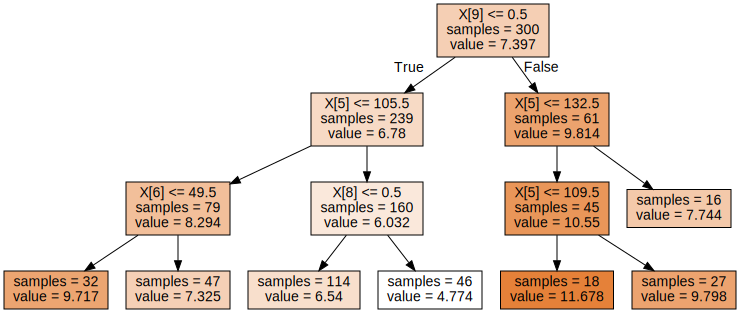

In [19]:
tree = DecisionTreeRegressor(max_depth=3, min_samples_leaf = 14,random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.5f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.5f}".format(tree.score(X_test, y_test)))
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", impurity=False, filled=True)
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [20]:
# (d)
from sklearn.ensemble import BaggingRegressor
regr = BaggingRegressor(random_state=0)
regr.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(regr.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(regr.score(X_test, y_test)))

Accuracy on training set: 0.920
Accuracy on test set: 0.641


In [21]:
# (e)
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(max_features=2, random_state=2)
forest.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))
forest = RandomForestRegressor(max_features=4, random_state=2)
forest.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))
forest = RandomForestRegressor(max_features=6, random_state=2)
forest.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

# The more variables considered per split the higher the test score.

Accuracy on training set: 0.938
Accuracy on test set: 0.540
Accuracy on training set: 0.946
Accuracy on test set: 0.641
Accuracy on training set: 0.950
Accuracy on test set: 0.667


We will now use boosting to predict Log Salary in the `Hitters` data set.  
(a) Format the data appropriately for this analysis. Use 200 observations in your training set.  
(b) Perform boosting on the training set with 1,000 trees for a range of values of the shrinkage parameter λ. Produce a plot with different shrinkage values on the x-axis and the corresponding training set MSE on the y-axis. Add a curve with different shrinkage values on the x-axis and the corresponding test set MSE on the y-axis. The shrinkage parameter is often referred to as the learning rate   
(c) Compare the test MSE of boosting to the test MSE of two of the penalized regression approaches that we discussed  
(d) Which variables appear to be the most important predictors in the boosted model?  
(e) The default for base estimator is a Decision Tree with a maximum depth of 3. Is that the optimal depth? Justify your response.  
(f) Now that the boosting model is tuned, let's compare the results to bagging and random forests. Report test errors for your models and discuss how they compare.

In [ ]:
df = pd.read_csv('Hitters.csv')
df = pd.get_dummies(df)
df.head()
df['logSalary'] = np.log(df['Salary'])
df = df.dropna()

df.tail(30)

In [23]:
df = df.head(200)
df.tail()


AtBat  Hits  HmRun  Runs  ...  Division_W  NewLeague_A  NewLeague_N  logSalary
243    256    70     13    42  ...           0            1            0   6.956545
244    466   108     33    75  ...           0            1            0   5.370638
245    327    68     13    42  ...           0            1            0   5.991465
247    341   110      9    45  ...           0            1            0   6.327937
248    608   160     28   130  ...           0            1            0   7.420579

[5 rows x 24 columns]

In [24]:
x = df.loc[:,[x for x in df.columns if x not in ('Salary', 'logSalary')]]
y = df['logSalary']
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42)


In [25]:
from sklearn.ensemble import GradientBoostingRegressor
gbrt = GradientBoostingRegressor(n_estimators=1000, random_state=0)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))
import matplotlib.pyplot as plt

Accuracy on training set: 1.000
Accuracy on test set: 0.824


In [26]:
las = Lasso(random_state=0).fit(X_train, y_train)
print("Accuracy on training set {:.3f}".format(las.score(X_train, y_train)))
print("Accuracy on test set {:.3f}".format(las.score(X_test, y_test)))

Accuracy on training set 0.529
Accuracy on test set 0.593


In [27]:
rid = Ridge(random_state=0).fit(X_train, y_train)
print("Accuracy on training set {:.3f}".format(rid.score(X_train, y_train)))
print("Accuracy on test set {:.3f}".format(rid.score(X_test, y_test)))

Accuracy on training set 0.602
Accuracy on test set 0.622


In [ ]:
# Boosting does considerably better than both Ridge and Lasso

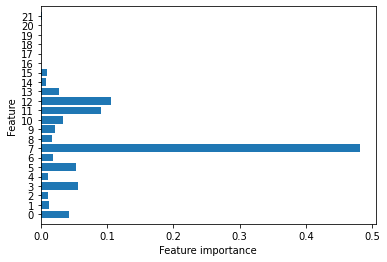

In [31]:
def plot_feature_importances(model):
    n_features = x.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features))
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances(gbrt)

In [ ]:
# CAtBT, CRBI, and CWalks are the most important features.

In [32]:
depth_grid = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8 ,9, 10 ]}
grid_search = GridSearchCV(GradientBoostingRegressor(),depth_grid, return_train_score=True)
best_model=grid_search.fit(X_train,y_train)
print("Best depth: ",best_model.best_estimator_.get_params()['max_depth'])

Best depth:  5


In [ ]:
# 3 is not the best max_depth here - cross-validation says that 5 is.

In [33]:
regr = BaggingRegressor(random_state=0).fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(regr.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(regr.score(X_test, y_test)))
forest = RandomForestRegressor(random_state=2).fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 0.951
Accuracy on test set: 0.802
Accuracy on training set: 0.965
Accuracy on test set: 0.822


In [ ]:
# Random forests edges out bagging in their test score, but gradient boosting barely does better than either of the others.

In this problem, you will use support vector approaches in order to predict whether a given car gets high or low gas mileage based on the Auto data set.  

#### NOTE: SVM algortihms will often take longer than other models to train, particularly when doing cross validation

(a) Create a binary variable that takes on a 1 for cars with gas mileage above the median, and a 0 for cars with gas mileage below the median.  
(b) Fit a support vector classifier to the data with various values of cost, in order to predict whether a car gets high or low gas mileage. Report the cross-validation errors associated with different values of this parameter. Comment on your results.  
(c) Make an ROC curve for your model. The module scikitplot has a nice function you might want to use but you should eb able to make it on your own or another module if you desire.

In [42]:
df = pd.read_csv('Auto.csv')
print(df.shape)
above_median = []
for i in df.mpg:
  if i > 23:
    above_median.append(1)
  else:
    above_median.append(0)
df["above_median"] = above_median
df.tail()

df = df[df.horsepower != '?']
df.horsepower = df.horsepower.astype('int32')
y = df['above_median']
x = df
x.drop(['mpg', 'name', 'above_median'], 1, inplace=True)
print(df.shape)


(397, 9)
(392, 7)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  app.launch_new_instance()


In [43]:
from sklearn.svm import LinearSVC
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42)

lsvc = LinearSVC(C=1, random_state=42, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.3f}".format(lsvc.score(X_train, y_train)))
print("Test set score: {:.3f}".format(lsvc.score(X_test, y_test)))

Training set score: 0.806
Test set score: 0.816


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [44]:
lsvc100 = LinearSVC(C=100, random_state=42, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.3f}".format(lsvc100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(lsvc100.score(X_test, y_test)))
lsvc100000 = LinearSVC(C=100000, random_state=42, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.3f}".format(lsvc100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(lsvc100.score(X_test, y_test)))

# They all give decent estimates, but with C=1 it performs much better than C=100 or C=100000.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Training set score: 0.854
Test set score: 0.847
Training set score: 0.854
Test set score: 0.847


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


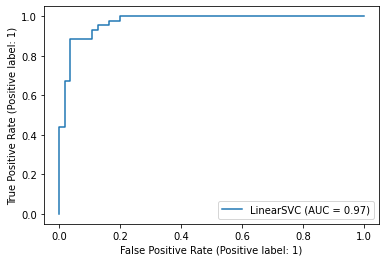

In [45]:
from sklearn import metrics
import matplotlib.pyplot as plt

metrics.plot_roc_curve(lsvc, X_test, y_test) 
plt.show()

Below there are some generated datasets of varying structure that you will classifying is SVMs, plotting the data to see what it looks like will likey be helpful. Find the basis kernel that does best job classifying each of them. Because the data is two dimensional, it might be nice to use a library like mlxtend which has a function that will display decision regions form an svm using a one of their functions.

In [80]:
from sklearn.datasets import make_moons
x, y = make_moons(n_samples=100, shuffle=True, noise=1/10, random_state=123)
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42)
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(),

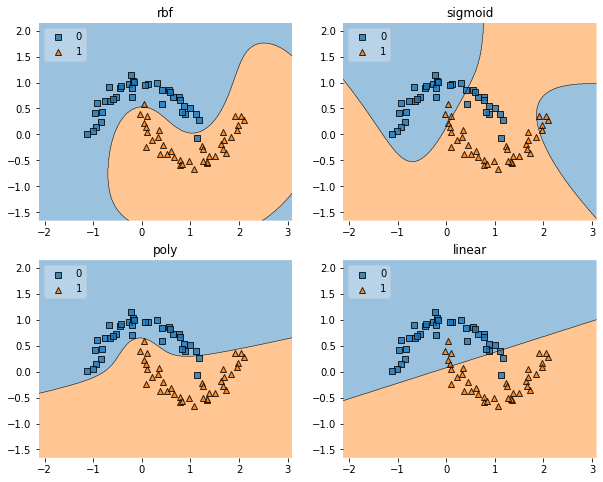

In [81]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import six
import sys
sys.modules['sklearn.externals.six'] = six
#import mlrose
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.data import iris_data
from mlxtend.plotting import plot_decision_regions

# Initializing Classifiers

clf1 = SVC(kernel='rbf', random_state=0, probability=True)
clf2 = SVC(kernel='sigmoid', random_state=0, probability=True)
clf3 = SVC(kernel='poly', random_state=0, probability=True)
clf4 = SVC(kernel='linear', random_state=0, probability=True)

# Loading some example data
X, y = iris_data()
X = X[:,[0, 2]]

# Plotting Decision Regions

gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(10, 8))

labels = ['rbf',
          'sigmoid',
          'poly',
          'linear']

for clf, lab, grd in zip([clf1, clf2, clf3, clf4],
                         labels,
                         itertools.product([0, 1],
                         repeat=2)):
    clf.fit(X_train, y_train)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_train, y=y_train,
                                clf=clf, legend=2)
    plt.title(lab)

plt.show()

In [83]:
# rbf does the best followed by poly.

In [82]:
from sklearn.datasets import make_circles
x, y = make_circles(n_samples=100, shuffle=False, noise=1/50, random_state=123, factor=0.6)
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42)


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(),

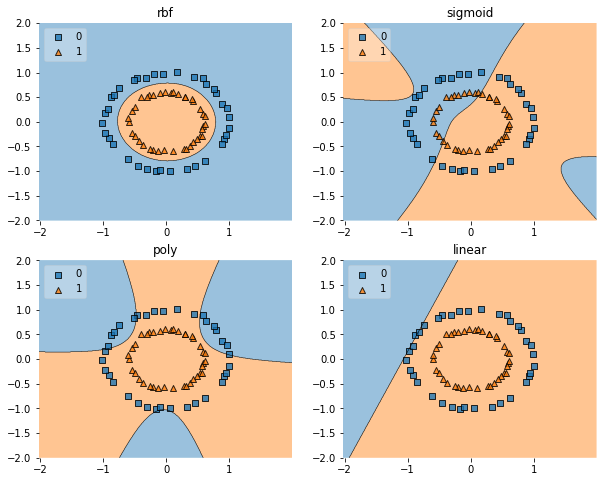

In [84]:

# Initializing Classifiers

clf1 = SVC(kernel='rbf', random_state=0, probability=True)
clf2 = SVC(kernel='sigmoid', random_state=0, probability=True)
clf3 = SVC(kernel='poly', random_state=0, probability=True)
clf4 = SVC(kernel='linear', random_state=0, probability=True)

# Loading some example data
X, y = iris_data()
X = X[:,[0, 2]]

# Plotting Decision Regions

gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(10, 8))

labels = ['rbf',
          'sigmoid',
          'poly',
          'linear']

for clf, lab, grd in zip([clf1, clf2, clf3, clf4],
                         labels,
                         itertools.product([0, 1],
                         repeat=2)):
    clf.fit(X_train, y_train)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_train, y=y_train,
                                clf=clf, legend=2)
    plt.title(lab)

plt.show()

In [ ]:
#rbf is the only one that does remotely well

In [85]:
from sklearn.datasets import make_blobs
x, y = make_blobs(n_samples=100, n_features=2, centers=None, cluster_std=2.0,
           center_box=(-10.0, 10.0), shuffle=True, random_state=10)
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42)


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(),

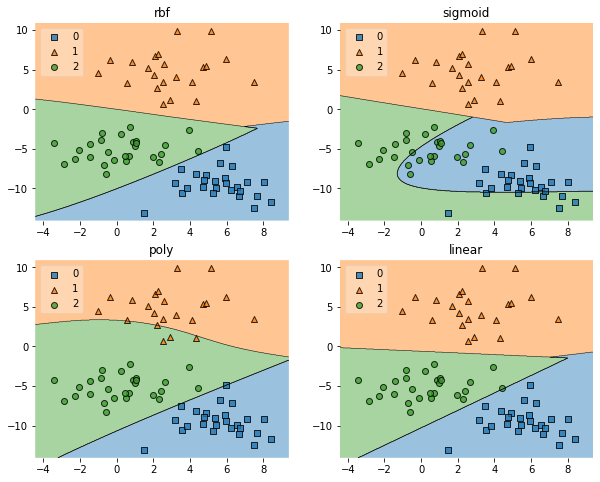

In [86]:

# Initializing Classifiers

clf1 = SVC(kernel='rbf', random_state=0, probability=True)
clf2 = SVC(kernel='sigmoid', random_state=0, probability=True)
clf3 = SVC(kernel='poly', random_state=0, probability=True)
clf4 = SVC(kernel='linear', random_state=0, probability=True)

# Loading some example data
X, y = iris_data()
X = X[:,[0, 2]]

# Plotting Decision Regions

gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(10, 8))

labels = ['rbf',
          'sigmoid',
          'poly',
          'linear']

for clf, lab, grd in zip([clf1, clf2, clf3, clf4],
                         labels,
                         itertools.product([0, 1],
                         repeat=2)):
    clf.fit(X_train, y_train)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_train, y=y_train,
                                clf=clf, legend=2)
    plt.title(lab)

plt.show()

In [ ]:
#rbf and linear do about equally well but none of the kernels perform awfully.